# Cross-Platform Music Consumption Analysis by Release Year

This notebook analyzes long-term music consumption patterns using a cross-platform streaming dataset.
The goal is to understand **which release years' songs accumulate the most listening over time**, based on
all-time streaming data available up to 2024.

Rather than focusing on individual songs, the analysis groups tracks by their release year and compares
average engagement across major platforms such as **Spotify, YouTube, and AirPlay**. This helps identify
catalog longevity and platform-specific listening behavior.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data/Most Streamed Spotify Songs 2024.csv", encoding="latin1")

## Dataset Overview

The dataset contains information about popular songs along with their streaming and engagement metrics
across multiple platforms.

Key points about the data:
- Each row represents a single song
- Streaming metrics represent **all-time accumulated counts up to 2024**
- The dataset includes multiple platforms (Spotify, YouTube, Pandora, etc.)
- Release dates are used to group songs by release year for temporal analysis


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [4]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


## Data Cleaning and Preparation

Before analysis, the dataset requires cleaning and preprocessing:

- Columns with no usable data were removed
- Several numeric metrics were stored as text and converted to numeric format
- Missing values were handled conservatively to avoid introducing assumptions
- Release dates were parsed and a `release_year` feature was extracted

These steps ensure the data is suitable for aggregation and comparison across years.


In [5]:
cols_to_numeric = [
    "All Time Rank",
    "Spotify Streams",
    "Spotify Playlist Count",
    "Spotify Playlist Reach",
    "Spotify Popularity",
    "YouTube Views",
    "YouTube Likes",
    "TikTok Posts",
    "TikTok Likes",
    "TikTok Views",
    "YouTube Playlist Reach",
    "Apple Music Playlist Count",
    "AirPlay Spins",
    "SiriusXM Spins",
    "Deezer Playlist Count",
    "Deezer Playlist Reach",
    "Amazon Playlist Count",
    "Pandora Streams",
    "Pandora Track Stations",
    "Soundcloud Streams",
    "Shazam Counts",
    "Explicit Track"
]


In [6]:
for col in cols_to_numeric:
    df[col] = (
        df[col]
        .astype(str)                 # make sure it's string
        .str.replace(",", "")        # remove commas
        .pipe(pd.to_numeric, errors="coerce")
    )


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [8]:
count_cols = [
    "Spotify Streams",
    "YouTube Views",
    "TikTok Views",
    "Pandora Streams",
    "Soundcloud Streams"
]

df[count_cols] = df[count_cols].fillna(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4600 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4600 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [10]:
df["Release Date"] = pd.to_datetime(
    df["Release Date"],
    errors="coerce"
)

In [11]:
df["release_year"] = df["Release Date"].dt.year


In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int64         
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4600 non-null   float64       
 8   Spotify Playlist Count      4530 non-null   float64       
 9   Spotify Playlist Reach      4528 non-null   float64       
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4600 non-null   float64     

,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,release_year
count,4600,4600.000000,4600.000000,4.600000e+03,4530.000000,4.528000e+03,3796.000000,4.600000e+03,4.285000e+03,3.427000e+03,...,3679.000000,3.672000e+03,3545.000000,4.600000e+03,3.332000e+03,4.600000e+03,4.023000e+03,0.0,4600.000000,4600.000000
mean,2021-01-27 07:48:18.782608896,2290.678043,41.844043,4.363971e+08,59390.829801,2.334682e+07,63.501581,3.758269e+08,2.930049e+06,9.443076e+05,...,32.310954,1.294939e+06,25.348942,6.506994e+07,8.787697e+04,4.089647e+06,2.529149e+06,NaN,0.358913,2020.616739
min,1987-07-21 00:00:00,1.000000,19.400000,0.000000e+00,1.000000,1.000000e+00,1.000000,0.000000e+00,2.500000e+01,1.000000e+00,...,1.000000,1.000000e+00,1.000000,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,NaN,0.000000,1987.000000
25%,2019-07-16 18:00:00,1144.750000,23.300000,6.340627e+07,6718.000000,4.791612e+06,61.000000,2.821574e+07,4.095490e+05,3.818650e+04,...,5.000000,5.216600e+04,8.000000,6.282500e+02,1.261500e+03,0.000000e+00,2.301950e+05,NaN,0.000000,2019.000000
50%,2022-06-01 00:00:00,2290.500000,29.900000,2.263761e+08,32312.500000,1.325948e+07,67.000000,1.283531e+08,1.257935e+06,1.822000e+05,...,15.000000,2.371205e+05,17.000000,2.906567e+06,7.832000e+03,0.000000e+00,8.545840e+05,NaN,0.000000,2022.000000
75%,2023-08-11 00:00:00,3436.250000,44.425000,6.113563e+08,86038.750000,2.966069e+07,73.000000,4.204637e+08,3.573193e+06,7.948775e+05,...,37.000000,9.063012e+05,34.000000,4.669138e+07,4.922400e+04,1.237098e+05,2.684638e+06,NaN,1.000000,2023.000000
max,2024-06-14 00:00:00,4998.000000,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,4.290000e+07,...,632.000000,4.819785e+07,210.000000,1.463624e+09,3.780513e+06,3.198359e+08,2.197945e+08,NaN,1.000000,2024.000000
std,NaN,1322.878312,38.543766,5.362792e+08,71131.406625,2.968717e+07,16.186438,6.854251e+08,4.593640e+06,2.442080e+06,...,54.274538,3.555543e+06,25.989826,1.508180e+08,2.608537e+05,1.811728e+07,6.038786e+06,NaN,0.479734,3.611707


## Feature Engineering and Aggregation

To analyze temporal trends, songs are grouped by their **release year**.
For each year, platform-specific engagement metrics are aggregated using summary statistics.

Since streaming counts are highly skewed due to a small number of extremely popular tracks,
both **mean** and **median** statistics were considered. The analysis primarily focuses on
robust year-level trends rather than individual song performance.


In [13]:

avg_spotify_by_year = (
    df
    .groupby("release_year")["Spotify Streams"]
    .mean()
    .reset_index()
)


In [14]:

median_spotify_by_year = (
    df
    .groupby("release_year")["Spotify Streams"]
    .median()
    .reset_index()
)


In [15]:

avg_youtube_by_year = (
    df
    .groupby("release_year")["YouTube Views"]
    .mean()
    .reset_index()
)


In [16]:

median_youtube_by_year = (
    df
    .groupby("release_year")["YouTube Views"]
    .median()
    .reset_index()
)


In [17]:

avg_Airplay_by_year = (
    df
    .groupby("release_year")["AirPlay Spins"]
    .mean()
    .reset_index()
)

In [18]:

median_Airplay_by_year = (
    df
    .groupby("release_year")["AirPlay Spins"]
    .median()
    .reset_index()
)

In [19]:
explicit_non_explicit = (
    df
    .groupby(["release_year","Explicit Track"])[["Spotify Streams","YouTube Views","AirPlay Spins"]]
    .median()
    .reset_index()
)


## Spotify Streams by Release Year

This section examines how songs from different release years compare in terms of
**total accumulated Spotify streams**.

By grouping songs by release year and computing summary statistics, we can observe
which eras of music continue to dominate listening behavior on Spotify.


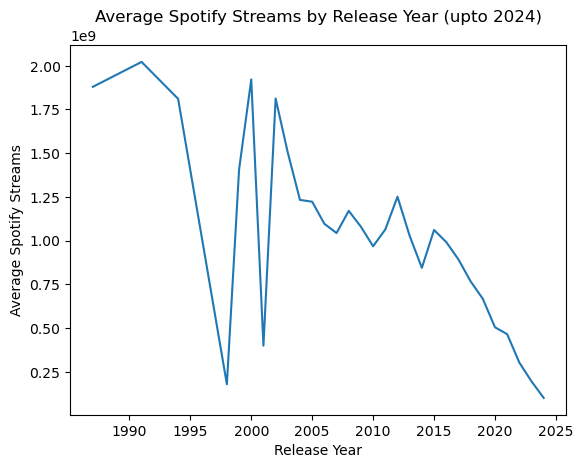

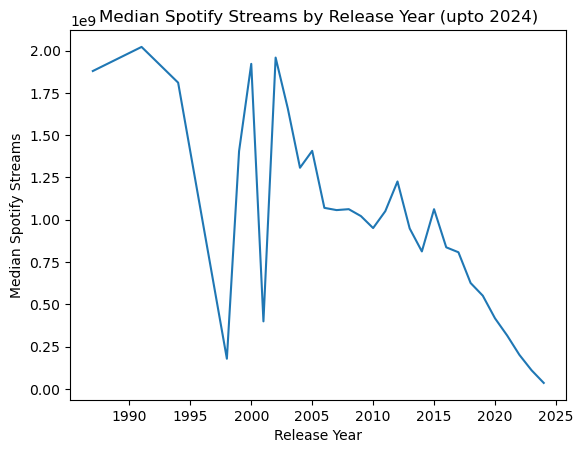

In [20]:


sns.lineplot(
    data=avg_spotify_by_year,
    x="release_year",
    y="Spotify Streams"
)

plt.title("Average Spotify Streams by Release Year (upto 2024)")
plt.xlabel("Release Year")
plt.ylabel("Average Spotify Streams")

plt.show()


sns.lineplot(
    data=median_spotify_by_year,
    x="release_year",
    y="Spotify Streams"
)

plt.title("Median Spotify Streams by Release Year (upto 2024)")
plt.xlabel("Release Year")
plt.ylabel("Median Spotify Streams")

plt.show()




## YouTube Views by Release Year

YouTube represents a different mode of music consumption, combining audio and visual engagement.
This section analyzes how songs from different release years perform in terms of
**total accumulated YouTube views**.

Comparing YouTube trends with Spotify helps highlight differences in platform-specific
listening behavior and content longevity.


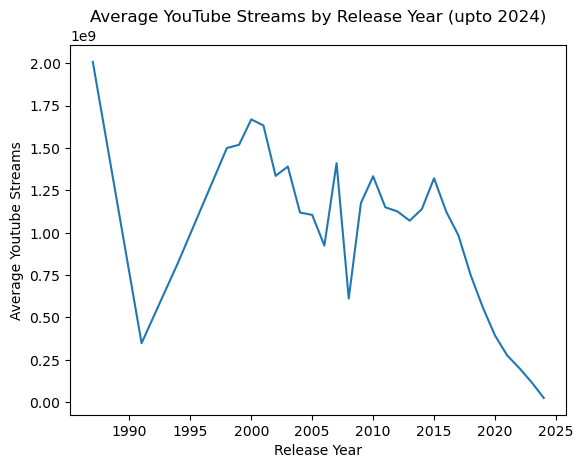

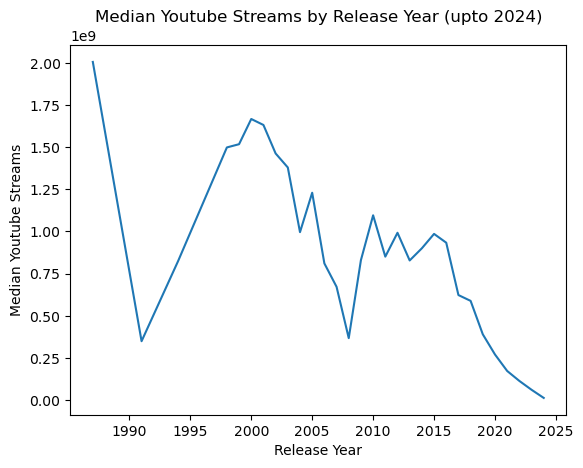

In [21]:
sns.lineplot(
    data=avg_youtube_by_year,
    x = "release_year",
    y = "YouTube Views"
)


plt.title("Average YouTube Streams by Release Year (upto 2024)")
plt.xlabel("Release Year")
plt.ylabel("Average Youtube Streams")

plt.show()


sns.lineplot(
    data=median_youtube_by_year,
    x="release_year",
    y="YouTube Views"
)

plt.title("Median Youtube Streams by Release Year (upto 2024)")
plt.xlabel("Release Year")
plt.ylabel("Median Youtube Streams")

plt.show()


## AirPlay Streams by Release Year

Airplay streams provide insight into radio-style and legacy listening behavior.
This section explores how songs from various release years accumulate streams on Airplay.

Because Airplay usage patterns differ from on-demand streaming platforms, these trends
offer a useful contrast to Spotify and YouTube.


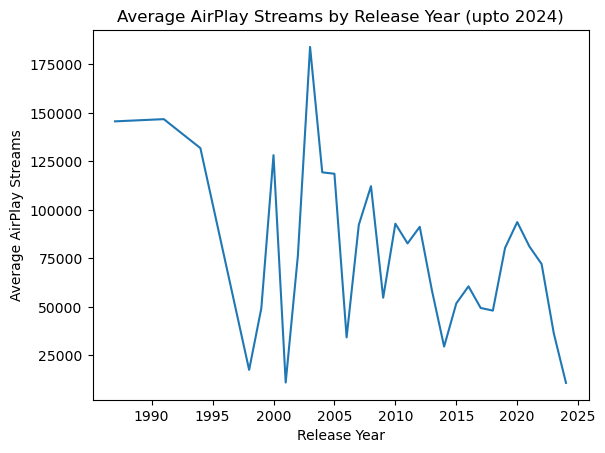

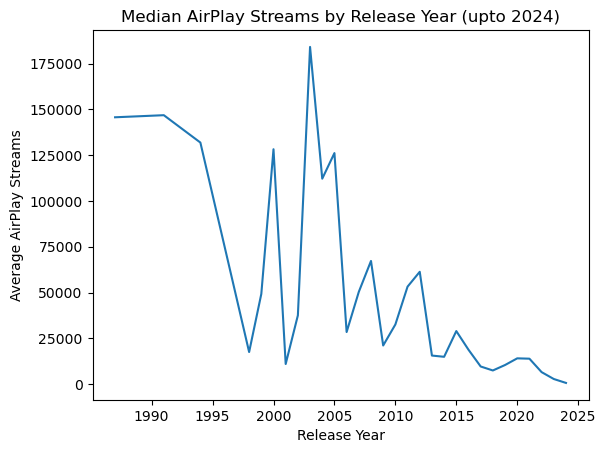

In [22]:
sns.lineplot(
    data=avg_Airplay_by_year,
    x = "release_year",
    y = "AirPlay Spins"
)


plt.title("Average AirPlay Streams by Release Year (upto 2024)")
plt.xlabel("Release Year")
plt.ylabel("Average AirPlay Streams")

plt.show()


sns.lineplot(
    data=median_Airplay_by_year,
    x = "release_year",
    y = "AirPlay Spins"
)


plt.title("Median AirPlay Streams by Release Year (upto 2024)")
plt.xlabel("Release Year")
plt.ylabel("Average AirPlay Streams")

plt.show()

## Explicit vs Non-Explicit Songs Across Release Years
This section compares long-term listening behavior between **explicit** and **non-explicit** songs
across different release years. Songs are grouped by release year and explicit flag, and median
platform-specific engagement is used to reduce the influence of extreme outliers.

The goal is to understand how content explicitness relates to **catalog longevity** rather than
short-term popularity.


### Spotify

On Spotify, non-explicit songs dominate older release years in terms of median accumulated streams,
reflecting the long-term strength of legacy catalog content. However, from the mid-2000s onward,
explicit songs show comparable and occasionally higher median streams, indicating increasing audience
acceptance and engagement with explicit content in more recent eras.

Both categories decline in the most recent years, largely due to reduced time available for
accumulating streams.


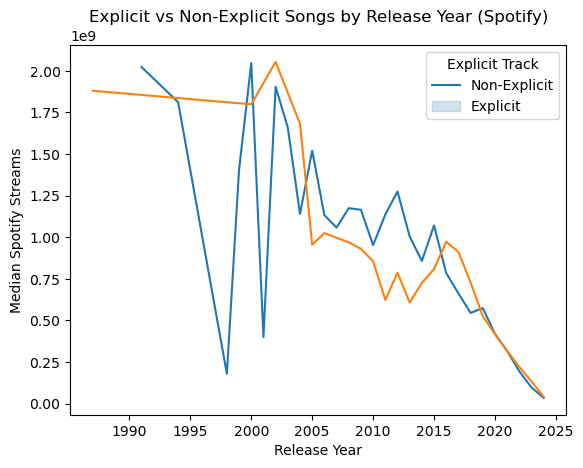

In [23]:
sns.lineplot(
    data=explicit_non_explicit,
    x="release_year",
    y="Spotify Streams",
    hue="Explicit Track"
)

plt.title("Explicit vs Non-Explicit Songs by Release Year (Spotify)")
plt.xlabel("Release Year")
plt.ylabel("Median Spotify Streams")
plt.legend(title="Explicit Track", labels=["Non-Explicit", "Explicit"])

plt.show()










### YouTube

On YouTube, non-explicit songs maintain higher median views across most release years. Explicit songs
exhibit higher volatility, suggesting that a smaller number of highly popular tracks drive engagement
rather than consistent performance across the catalog.

This indicates that YouTube consumption favors broadly appealing, long-lived content over explicit
trends.


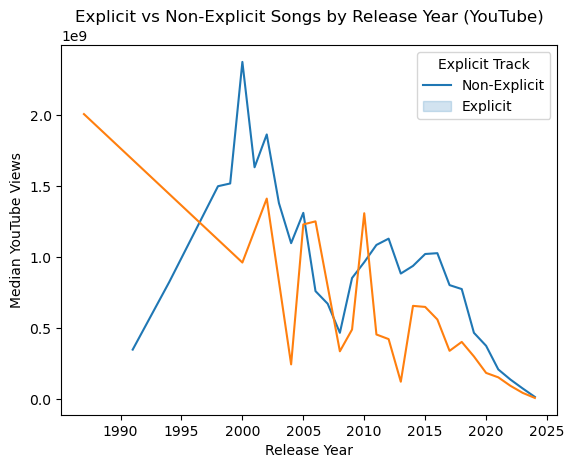

In [24]:
sns.lineplot(
    data=explicit_non_explicit,
    x="release_year",
    y="YouTube Views",
    hue="Explicit Track"
)

plt.title("Explicit vs Non-Explicit Songs by Release Year (YouTube)")
plt.xlabel("Release Year")
plt.ylabel("Median YouTube Views")
plt.legend(title="Explicit Track", labels=["Non-Explicit", "Explicit"])

plt.show()

### AirPlay

AirPlay data shows a strong and consistent preference for non-explicit songs across all release years.
Explicit tracks accumulate significantly fewer median AirPlay spins, aligning with traditional radio
programming standards and content restrictions.

This highlights clear platform differences in how explicit content is distributed and consumed.


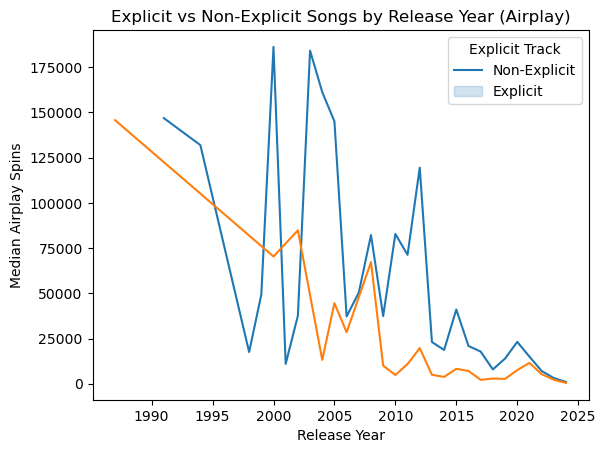

In [25]:
sns.lineplot(
    data=explicit_non_explicit,
    x="release_year",
    y="AirPlay Spins",
    hue="Explicit Track"
)

plt.title("Explicit vs Non-Explicit Songs by Release Year (Airplay)")
plt.xlabel("Release Year")
plt.ylabel("Median Airplay Spins")
plt.legend(title="Explicit Track", labels=["Non-Explicit", "Explicit"])

plt.show()

## Key Insights and Conclusions

- Songs released in certain earlier decades show significantly higher total accumulated streams,
  highlighting the long-term value of music catalogs.
- Newer songs generally appear lower in total streams, largely due to having had less time to
  accumulate listens rather than lower popularity.
- Platform behavior differs noticeably: Spotify emphasizes modern streaming growth, YouTube shows
  broader longevity across eras, and Pandora favors older catalog content.
- Aggregating by release year provides a clear, interpretable view of long-term music consumption trends.
- Explicit tracks show stronger competitiveness on on-demand streaming platforms like Spotify in more recent release years, while non-explicit songs dominate long-term performance on broader and radio-oriented platforms such as YouTube and AirPlay.
This highlights how platform type significantly influences the long-term consumption patterns of explicit versus non-explicit content.

Overall, this analysis demonstrates how historical release periods continue to shape current
listening behavior across different music platforms.
